<h1><center>Spike Train Analysis Using Python <small>(and pandas!)</small></center></h1>
<h2><center>PD Dr. Thomas Künzel</center></h1>

## Prerequisites and Course Concept
This lecture represents the introductory section of a data analysis hands-on practical course

### From neuroscience lectures you...
- ...understand the classical methods of neurophysiology
- ...know about the functional neuroanatomy of the auditory pathway

### From prior lessons in this neuronal data analysis series you ...
- ...understand basic python syntax and concepts and can import modules
- ...have a basic understanding of working with arrays (numpy)
- ...can create and decorate plots (matplotlib)
- ...understand basic principles of detection and sorting of neuronal events 

## Learning Outcomes of todays lesson

You...
- ...understand the reasons to analyze spike time data in sensory neuroscience
- ...can create visualizations of neuronal responses over time and experimental parameters
- ...can create visualizations of neuronal responses with respect to periodic stimuli

- ...know about the pandas library and the dataframe format it offers
- ...can perform basic operations on pandas dataframes

<table>
<tr>
    <td><div><img src="Python_logo.png" width="150"></div></td>
    <td><div><img src="Pandas_logo.png" width="150"></div></td>
</tr>
</table>


#### Raw Trace
<div align="center">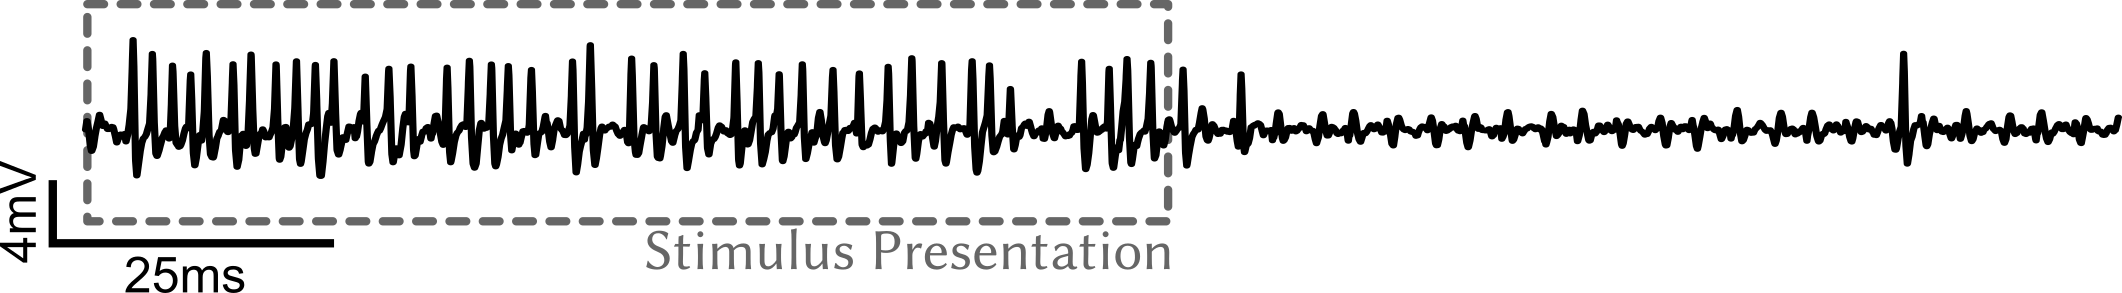</div>

#### Spike Detection / Sorting
<div align="center">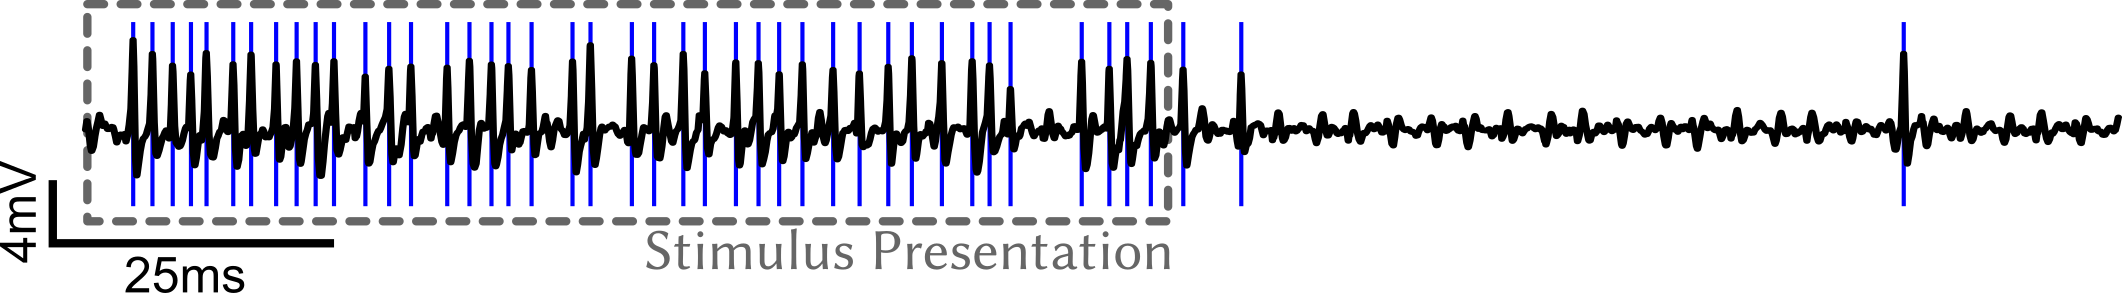</div>

#### spike times = [0.0031, 0.0043, 0.0052, 0.0043...] (in s)

<div align="center">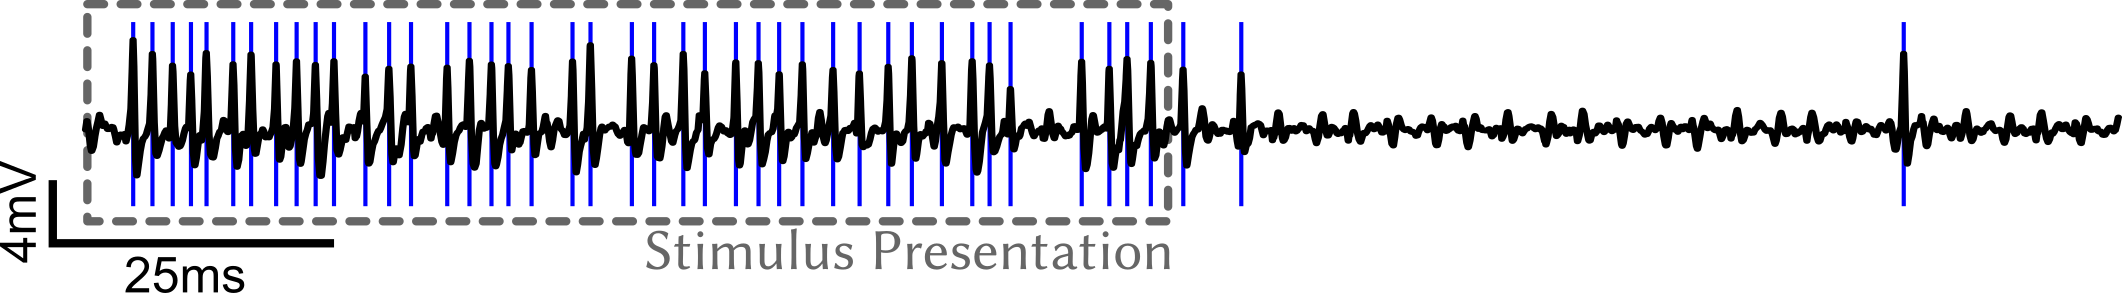</div>

#### What to do with spike time data?
- observe and classify distribution of events in time **(response pattern/type)**
- periodic stimulus: observe relation of events to phase of the stimulus
- count number of events **(response rate)**
- measure delay to the occurence of events **(response latency)**
- observe regularity/randomness of events
- correlate spike times within one neuron / between different neurons

# How to visualize spike data I: Rasterplot

## Imports / Load Example Dataset


In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("tkjupy.mplstyle")

In [2]:
D = pd.read_pickle("exampledata.pkl") 

In [3]:
D.head(3) 

,Animal,Unit,expID,s1freq,s1level,cond,rep,spt,dur,stimdur
0,GrbAc057,1,0,100,70,0,1,"[0.02213, 0.02975, 0.04969, 0.07536, 0.08077, ...",0.4,0.1
1,GrbAc057,1,0,100,70,0,2,"[0.0028, 0.03248, 0.0398, 0.06049, 0.07038, 0....",0.4,0.1
2,GrbAc057,1,0,100,70,0,3,"[0.00175, 0.03, 0.03877, 0.08976, 0.12311, 0.1...",0.4,0.1


In [4]:
D.tail(3)

,Animal,Unit,expID,s1freq,s1level,cond,rep,spt,dur,stimdur
157,GrbAc057,1,4,500,70,8,8,"[0.004, 0.00607, 0.01027, 0.01399, 0.01622, 0....",0.4,0.1
158,GrbAc057,1,4,500,70,8,9,"[0.00407, 0.0082, 0.01221, 0.01425, 0.01823, 0...",0.4,0.1
159,GrbAc057,1,4,500,70,8,10,"[0.00418, 0.00626, 0.00822, 0.01007, 0.0142, 0...",0.4,0.1


In [5]:
D[D.expID == 0].tail(3)

,Animal,Unit,expID,s1freq,s1level,cond,rep,spt,dur,stimdur
67,GrbAc057,1,0,10000,70,6,8,"[0.00284, 0.03404, 0.1, 0.1195, 0.15898, 0.167...",0.4,0.1
68,GrbAc057,1,0,10000,70,6,9,"[0.00279, 0.02152, 0.10282, 0.13194, 0.15572, ...",0.4,0.1
69,GrbAc057,1,0,10000,70,6,10,"[0.01034, 0.05626, 0.10262, 0.1164, 0.15196, 0...",0.4,0.1


In [6]:
D.spt[0]

array([0.02213, 0.02975, 0.04969, 0.07536, 0.08077, 0.09914, 0.13751,
       0.1575 , 0.17026, 0.19128, 0.23195, 0.24233, 0.26302, 0.28614,
       0.31857, 0.32672, 0.35007, 0.35747, 0.37126])

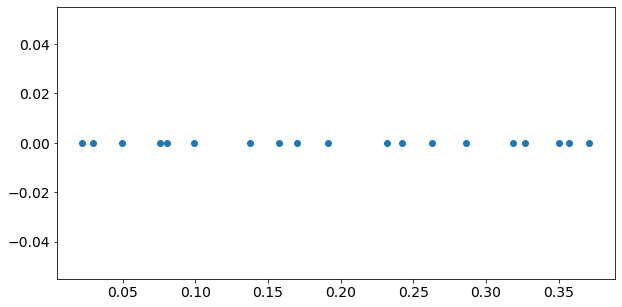

In [37]:
plt.figure(figsize=(10, 5))
plt.plot(D.spt[0], np.zeros(D.spt[0].size), "o") #how do we "show" spike time???
plt.show()

In [34]:
D["presentation"] = D.cond + D.rep / 10 

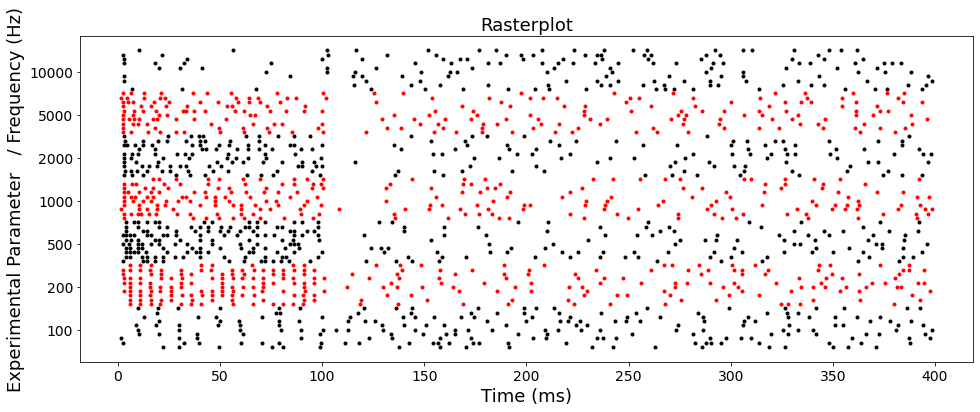

In [35]:
plt.figure(figsize=(16, 6))       
cols = ("k", "r")
sh = plt.subplot(1, 1, 1)
for idx, row in D[D.expID == 0].iterrows():
    sh.plot(
        row.spt * 1000.0,
        np.zeros(row.spt.size) + row.presentation,      
        linestyle="none", marker=".", color=cols[row.cond % 2],
    )
sh.set(
    yticks=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5], yticklabels=[100, 200, 500, 1000, 2000, 5000, 10000],
    title="Rasterplot", xlabel="Time (ms)", ylabel="Experimental Parameter / Frequency (Hz)",
    )
plt.show()

# How to visualize spike data II: Cyclehistogram

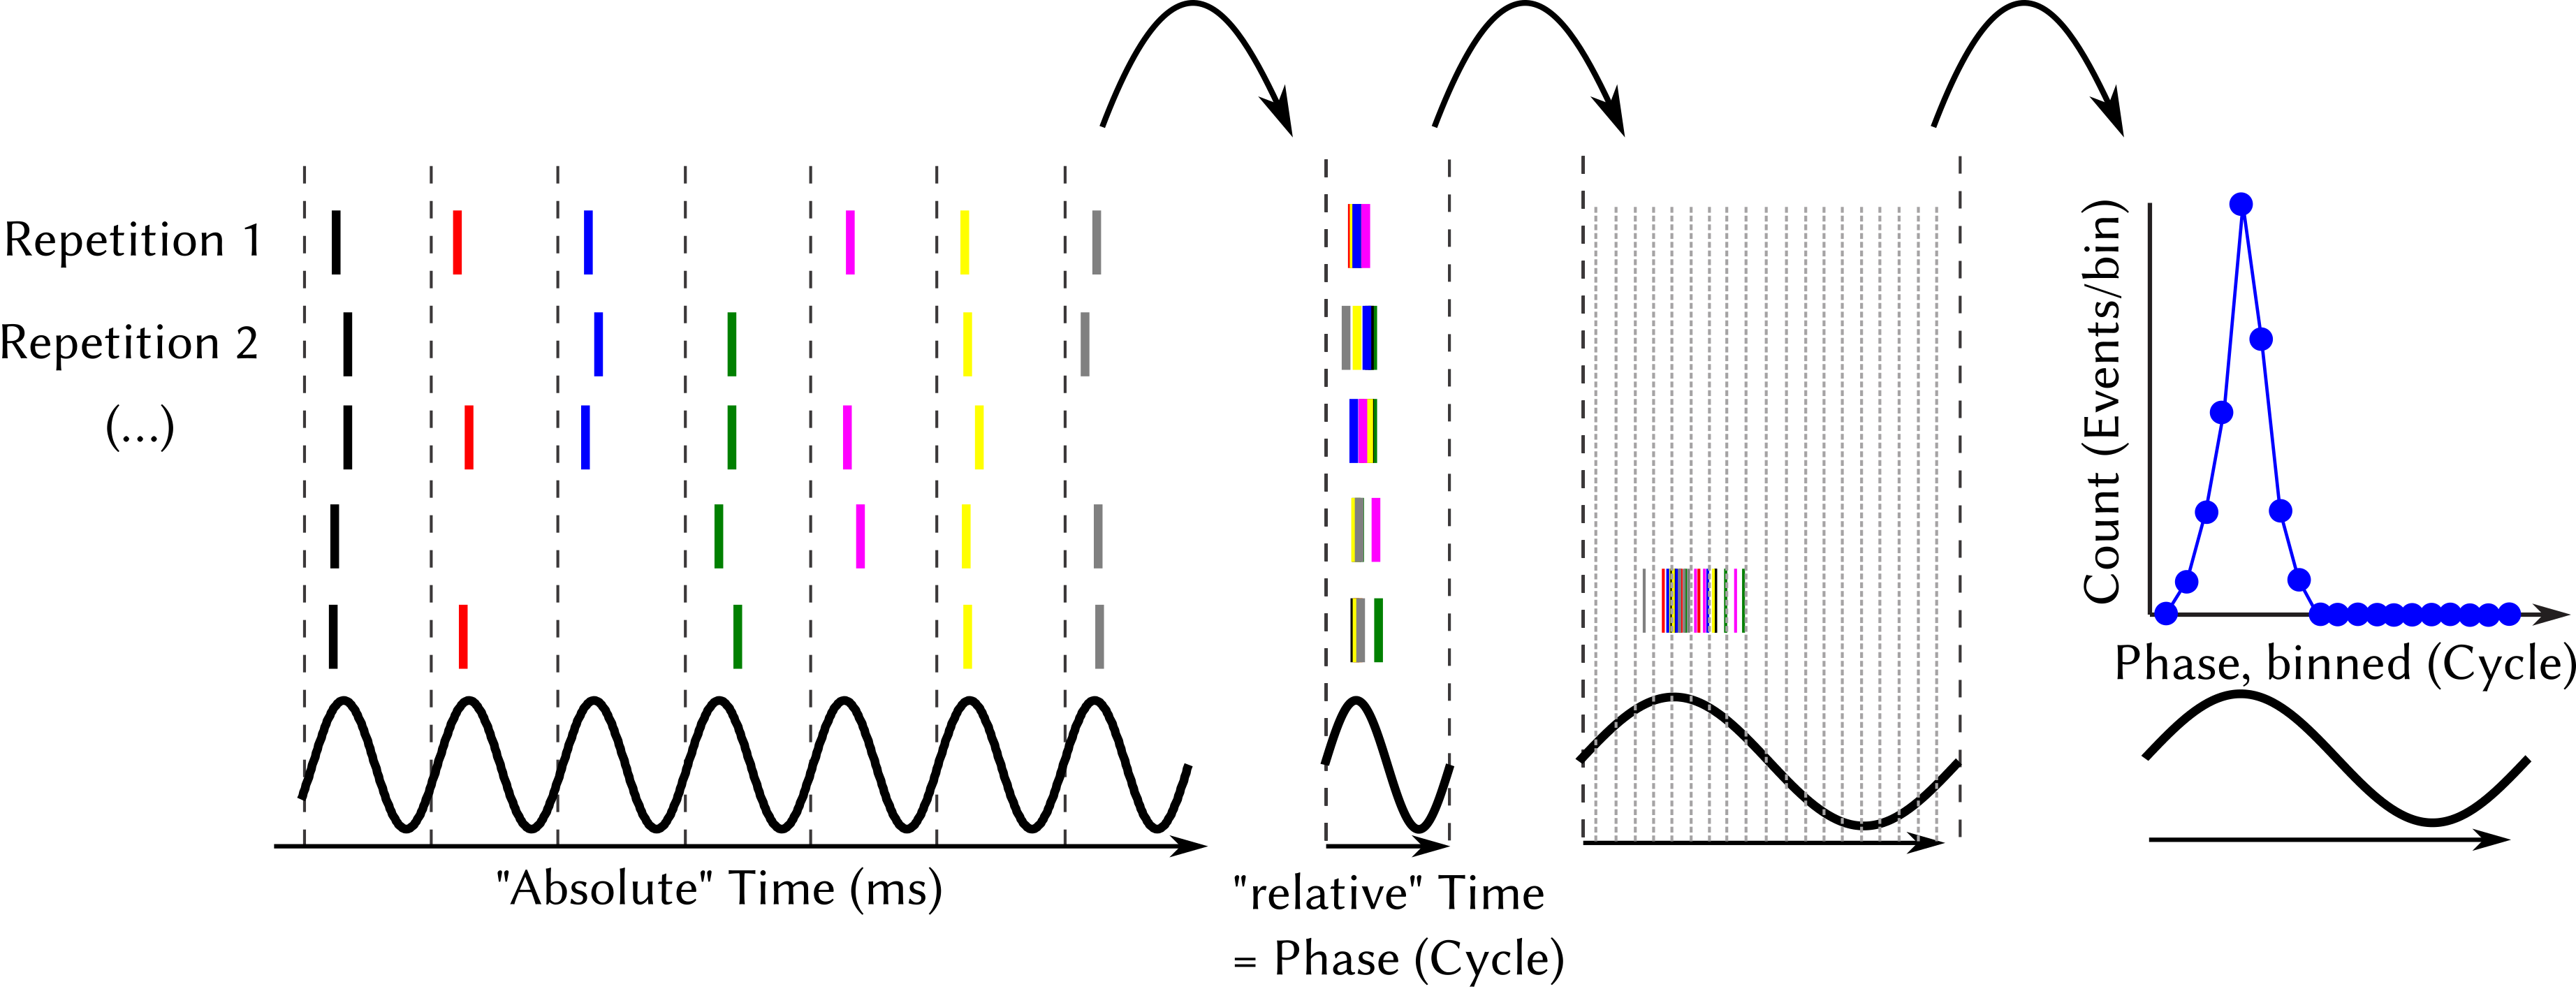

In [27]:
frequency = 200#Hz
s2 = np.concatenate(D[(D.expID == 0) & (D.s1freq == frequency)].spt.to_numpy()) * 1000.0 #all events
s2 = s2[(s2 > 5) & (s2 < 100.0)] #select only spikes during stimulus presentation 

In [11]:
period = 1e3 / frequency
cycles = (s2 % period) / period
rads = cycles * 2 * np.pi

In [23]:
s2[:9]#spiketimes

array([ 5.95, 11.01, 16.05, 20.91, 30.91, 36.09, 40.93, 56.3 , 66.11])

In [24]:
cycles[:9]#relative spiketimes (in cycles)

array([0.19 , 0.202, 0.21 , 0.182, 0.182, 0.218, 0.186, 0.26 , 0.222])

In [26]:
rads[:9]#relative spiketimes (in radians)

array([1.19380521, 1.26920343, 1.31946891, 1.14353973, 1.14353973,
       1.3697344 , 1.16867247, 1.63362818, 1.39486714])

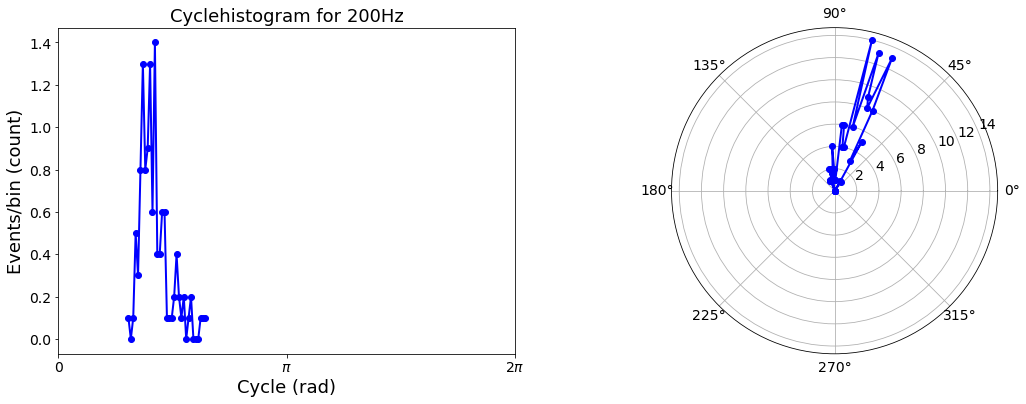

In [30]:
nbins = 33
bins = np.linspace(0, 2*np.pi, nbins)
counts, edges = np.histogram(rads, nbins)#Calculate the histogram values

plt.figure(figsize=(18, 6))
sh1 = plt.subplot(1, 2, 1)
sh1.plot(edges[1:], counts / 10, "bo-")
sh1.set(
    xlim=(0, 2*np.pi), xlabel="Cycle (rad)", xticks=(0, np.pi, 2*np.pi),
    xticklabels=("0", r"$\pi$", r"$2\pi$"), ylabel="Events/bin (count)",
    title="Cyclehistogram for " + str(frequency) + "Hz",
    )
sh2 = plt.subplot(1, 2, 2, projection="polar")
sh2.plot(edges[1:],counts,"bo-")
plt.show()  


## After todays lesson you...

- understand the information contained in spike time data
- can create rasterplots of spike time data and know how to interpret them
- can visualize the relation of spike times to a periodic stimulus with cyclehistograms
- learned about the dataframe format of the pandas library and know how to perform basic operations on dataframes (load, inspect, iterate over columns, add columns...)

## Next lesson: quantitative metrics
- response rates in relation to experimental parameters
- response latencies
- precision of phase-locking

## Excercises for today:
Please download the example data and the jupyter notebook used for the lecture now.

The exampledata contains a second experiment! <small>(hint: D.expID == 4)</small>
- identify the experimental parameter in the second experiment by inspecting the dataframe
- create a rasterplot for the second experiment
- create cyclehistograms for the second experiment
- optional: how does the cyclehistogram change with the experimental parameter?

Submit your modified jupyter notebook with the completed exercises at the end of the course. As usual I will be available for questions!